Your friend suspects that movies are getting shorter and they've found some initial evidence of this. Having peaked your interest, you will perform exploratory data analysis on the netflix_data.csv data to understand what may be contributing to movies getting shorter over time. Your analysis will follow these steps:

Load the CSV file and store as netflix_df.
Filter the data to remove TV shows and store as netflix_subset.
Investigate the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.
Filter netflix_movies to find the movies that are shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.
Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. Initialize a figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".
After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes", "no", or "maybe" to the variable answer.
Click the "Submit Project" button to check your solution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
netflix_df=pd.read_csv("netflix_data.csv")

In [9]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [11]:
#Filter the data to remove TV shows and store as netflix_subset.
netflix_subset=netflix_df[netflix_df["type"]=="Movie"]

In [14]:
netflix_subset.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [35]:
#Investigate the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies
netflix_movies=netflix_subset[["title","country","genre","release_year","duration"]]

In [36]:
netflix_movies.head(5)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [37]:
#Filter netflix_movies to find the movies that are shorter than 60 minutes, saving the resulting DataFrame as short_movies; 
#inspect the result to find possible contributing factors
short_movies=netflix_movies[netflix_movies["duration"]< 60]

In [38]:
short_movies.head(5)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


In [39]:
#Using a for loop and if/elif statements, 
#iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else).
#Save the results in a colors list. Initialize a figure object called fig and create a scatter plot for movie duration by release year
#using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release"
colors=[]
# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies.iterrows() :
    if row['genre'] == "Children" :
        colors.append("red")
    elif row['genre'] == "Documentaries" :
        colors.append("blue")
    elif row['genre'] == "Stand-Up" :
        colors.append("green")
    else:
        colors.append("black")

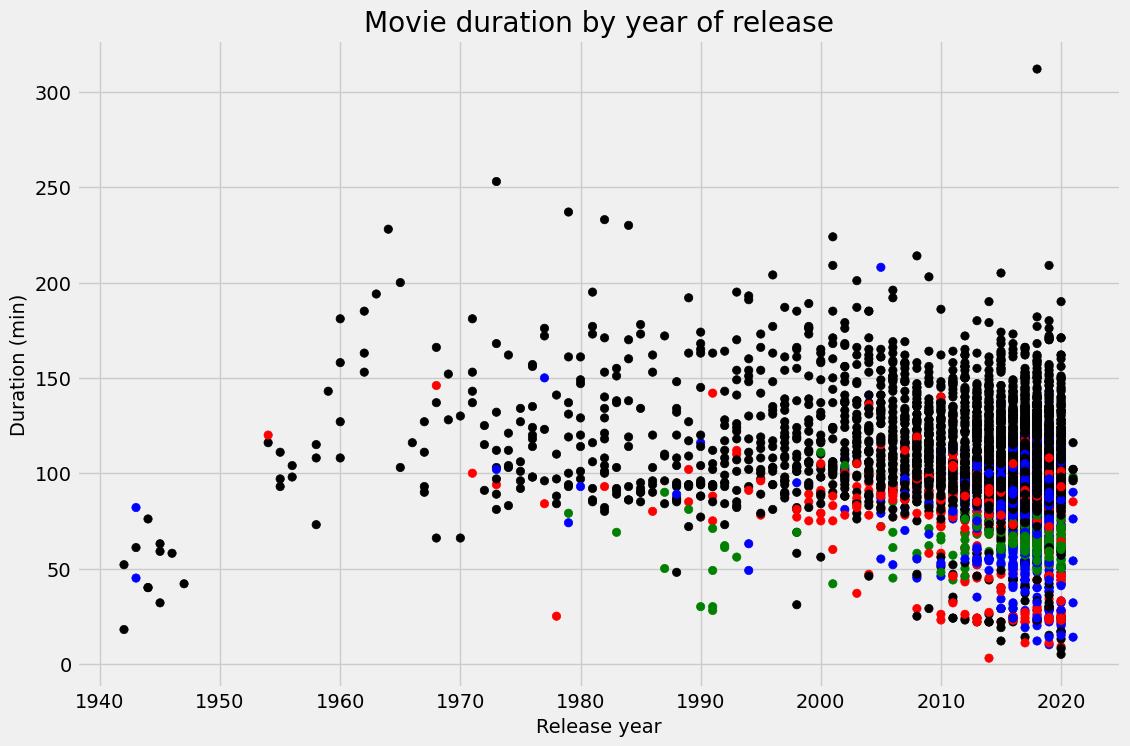

In [40]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies.release_year, netflix_movies.duration, color = colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()

In [42]:
are_movies_getting_shorter = "maybe"
print(are_movies_getting_shorter)

maybe
